In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

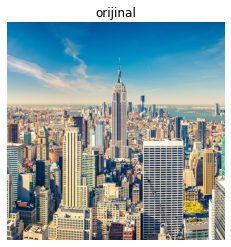

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Ortalama Bulanıklaştırma'))

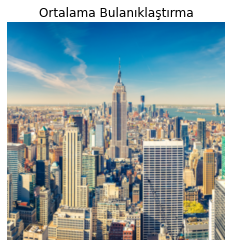

In [3]:
# bluring(detayı azaltır, gürültüyü engeller)
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

"""
Ortalama Bulanıklaştırma Yöntemi
"""
dst2 = cv2.blur(img, ksize = (3,3))
plt.figure(), plt.imshow(dst2), plt.axis("off"), plt.title("Ortalama Bulanıklaştırma")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Bulanıklaştırma'))

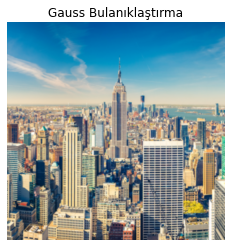

In [4]:
"""
Gauss Bulanıklaştırma Yöntemi
"""
gb = cv2.GaussianBlur(img, ksize = (3,3), sigmaX = 7)
plt.figure(), plt.imshow(gb), plt.axis("off"), plt.title("Gauss Bulanıklaştırma")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Medyan Bulanıklaştırma'))

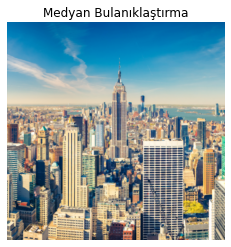

In [5]:
"""
Medyan Bulanıklaştırma Yöntemi
"""
mb = cv2.medianBlur(img, ksize = 3)
plt.figure(), plt.imshow(mb), plt.axis("off"), plt.title("Medyan Bulanıklaştırma")

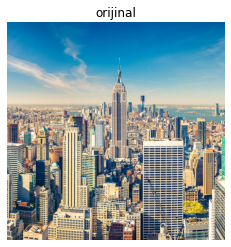

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'with Gauss Blur'))

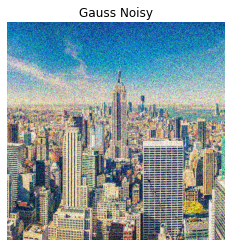

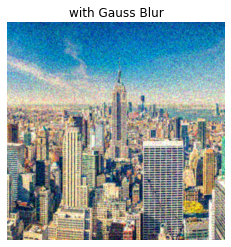

In [24]:
def gaussianNoise(image):
    row, col, ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5
    
    gauss = np.random.normal(mean, sigma, (row,col,ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    
    return noisy

# içe aktar ve normalize etmek
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

gaussianNoisyImage = gaussianNoise(img)
plt.figure(), plt.imshow(gaussianNoisyImage), plt.axis("off"), plt.title("Gauss Noisy")

# gauss blur
gb2 = cv2.GaussianBlur(gaussianNoisyImage, ksize = (3,3), sigmaX = 7)
plt.figure(), plt.imshow(gb2), plt.axis("off"), plt.title("with Gauss Blur")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'with Medyan Blur'))

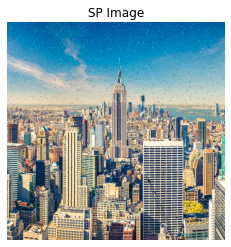

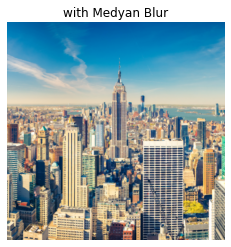

In [33]:
def saltPepperNoise(image):
    row, col, ch = image.shape
    s_vs_p = 0.5
    amount = 0.004
    noisy = np.copy(image)  # Orijinal görüntüyü bozmamak için kopyalama

    # Salt (Beyaz Noktacıklar) ekleme
    num_salt = np.ceil(amount * image.size * s_vs_p)
    salt_coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape[:2]]
    noisy[salt_coords[0], salt_coords[1], :] = 1  # Beyaz -> 1

    # Pepper (Siyah Noktacıklar) ekleme
    num_pepper = np.ceil(amount * image.size * (1 - s_vs_p))
    pepper_coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape[:2]]
    noisy[pepper_coords[0], pepper_coords[1], :] = 0  # Siyah -> 0

    return noisy

spImage = saltPepperNoise(img)   
plt.figure(), plt.imshow(spImage), plt.axis("off"), plt.title("SP Image")

mb2 = cv2.medianBlur(spImage.astype(np.float32), ksize = 3)
plt.figure(), plt.imshow(mb2), plt.axis("off"), plt.title("with Medyan Blur")